In [1]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler

from joblib import dump, load

# Préparation dataset

In [2]:
# Import des données
df = pd.read_csv('data/merged_data_2018_2021_for_model.csv' )
df.shape

(423136, 34)

In [3]:
# Encodage des variables catégorielles
cat_var = df.select_dtypes(include='object').columns
encoded_cat = pd.get_dummies(df[cat_var], prefix=cat_var, drop_first=True).astype(int)
df = df.drop(columns=cat_var)
df = pd.concat([df, encoded_cat], axis=1)
print('Taille de dataset apres onehotconding',df.shape)


Taille de dataset apres onehotconding (423136, 51)


In [4]:
# Séparation de la variable cible et des variables explicatives
X = df.drop(['grav'], axis=1)
y = df['grav']

In [5]:
#  Division des données en ensemble d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101, stratify=y)

In [6]:
# Standardisation
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création variable cible binaire

In [7]:
# Création variable cible binaire
y_bin = y.replace([1, 2], 0) \
         .replace([3, 4], 1)
y_train_bin = y_train.replace([1, 2], 0) \
                         .replace([3, 4], 1)
y_test_bin = y_test.replace([1, 2], 0) \
                        .replace([3, 4], 1)

# Dummy classifier 4 classes

In [8]:
# Test DummyClassifier pour comparaison
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_scaled, y_train)
y_pred_dum = dummy_clf.predict(X_test_scaled)
print(classification_report(y_test,y_pred_dum))

              precision    recall  f1-score   support

         1.0       0.42      1.00      0.60     17964
         2.0       0.00      0.00      0.00      1096
         3.0       0.00      0.00      0.00      6667
         4.0       0.00      0.00      0.00     16587

    accuracy                           0.42     42314
   macro avg       0.11      0.25      0.15     42314
weighted avg       0.18      0.42      0.25     42314



C:\Users\juliette.brezillon\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\juliette.brezillon\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\juliette.brezillon\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN 4 classes

In [17]:
# KNN supervisé variable cible 4 catégories
# distance euclidienne

knn =  KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(X_train_scaled, y_train)

# train score
y_pred = knn.predict(X_train_scaled)
clsf_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('res/knn_4classes_euclidean_train.csv', index= True)
print(clsf_report)

# test score
y_pred= knn.predict(X_test_scaled)
clsf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('res/knn_4classes_euclidean_test.csv', index= True)
print(clsf_report)

# sauvegarde modèle
dump(knn, 'model/knn_4classes_euclidean.joblib')

C:\Users\juliette.brezillon\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score        support
1.0            0.714431  0.903099  0.797762  161670.000000
2.0            0.595995  0.277434  0.378621    9869.000000
3.0            0.614325  0.589947  0.601889   60002.000000
4.0            0.767741  0.587543  0.665662  149281.000000
accuracy       0.713848  0.713848  0.713848       0.713848
macro avg      0.673123  0.589506  0.610984  380822.000000
weighted avg   0.716486  0.713848  0.704256  380822.000000


C:\Users\juliette.brezillon\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score       support
1.0            0.616525  0.796705  0.695128  17964.000000
2.0            0.213992  0.094891  0.131479   1096.000000
3.0            0.379866  0.357132  0.368148   6667.000000
4.0            0.568119  0.422861  0.484844  16587.000000
accuracy       0.562722  0.562722  0.562722      0.562722
macro avg      0.444625  0.417897  0.419900  42314.000000
weighted avg   0.549836  0.562722  0.546579  42314.000000


['model/knn_4classes_euclidean.joblib']

In [18]:
# KNN supervisé variable cible 4 catégories
# distance minkowski

knn =  KNeighborsClassifier(n_neighbors=4, metric='minkowski')
knn.fit(X_train_scaled, y_train)

# train score
y_pred = knn.predict(X_train_scaled)
clsf_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('res/knn_4classes_minkowski_train.csv', index= True)
print(clsf_report)

# test score
y_pred= knn.predict(X_test_scaled)
clsf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('res/knn_4classes_minkowski_test.csv', index= True)
print(clsf_report)

# sauvegarde modèle
dump(knn, 'model/knn_4classes_minkowski.joblib')

C:\Users\juliette.brezillon\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score        support
1.0            0.714431  0.903099  0.797762  161670.000000
2.0            0.595995  0.277434  0.378621    9869.000000
3.0            0.614325  0.589947  0.601889   60002.000000
4.0            0.767741  0.587543  0.665662  149281.000000
accuracy       0.713848  0.713848  0.713848       0.713848
macro avg      0.673123  0.589506  0.610984  380822.000000
weighted avg   0.716486  0.713848  0.704256  380822.000000


C:\Users\juliette.brezillon\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score       support
1.0            0.616525  0.796705  0.695128  17964.000000
2.0            0.213992  0.094891  0.131479   1096.000000
3.0            0.379866  0.357132  0.368148   6667.000000
4.0            0.568119  0.422861  0.484844  16587.000000
accuracy       0.562722  0.562722  0.562722      0.562722
macro avg      0.444625  0.417897  0.419900  42314.000000
weighted avg   0.549836  0.562722  0.546579  42314.000000


['model/knn_4classes_minkowski.joblib']

In [11]:
# KNN supervisé variable cible 4 catégories
# distance Manhattan

knn =  KNeighborsClassifier(n_neighbors=4, metric='manhattan')
knn.fit(X_train_scaled, y_train)

# train score
y_pred = knn.predict(X_train_scaled)
clsf_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('res/knn_4classes_manhattan_train.csv', index= True)
print(clsf_report)

# test score
y_pred= knn.predict(X_test_scaled)
clsf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('res/knn_4classes_manhattan_test.csv', index= True)
print(clsf_report)

# sauvegarde modèle
dump(knn, 'model/knn_4classes_manhattan.joblib')

print(pd.read_csv('res/knn_4classes_manhattan_train.csv'))
print(pd.read_csv('res/knn_4classes_manhattan_test.csv'))


     Unnamed: 0  precision    recall  f1-score        support
0           1.0   0.728464  0.916255  0.811639  161670.000000
1           2.0   0.613284  0.300334  0.403210    9869.000000
2           3.0   0.629655  0.609296  0.619308   60002.000000
3           4.0   0.782641  0.600713  0.679714  149281.000000
4      accuracy   0.728238  0.728238  0.728238       0.728238
5     macro avg   0.688511  0.606650  0.628468  380822.000000
6  weighted avg   0.731148  0.728238  0.719037  380822.000000
     Unnamed: 0  precision    recall  f1-score       support
0           1.0   0.637928  0.821309  0.718096  17964.000000
1           2.0   0.218623  0.098540  0.135849   1096.000000
2           3.0   0.397488  0.379781  0.388433   6667.000000
3           4.0   0.590651  0.438777  0.503511  16587.000000
4      accuracy   0.583069  0.583069  0.583069      0.583069
5     macro avg   0.461173  0.434602  0.436472  42314.000000
6  weighted avg   0.570651  0.583069  0.566956  42314.000000


In [ ]:
# KNN supervisé variable cible 4 catégories
# distance Chebyshev

knn =  KNeighborsClassifier(n_neighbors=4, metric='chebyshev')
knn.fit(X_train_scaled, y_train)

# train score
y_pred = knn.predict(X_train_scaled)
clsf_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('res/knn_4classes_chebyshev_train.csv', index= True)
print(clsf_report)

# test score
y_pred= knn.predict(X_test_scaled)
clsf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('res/knn_4classes_chebyshev_test.csv', index= True)
print(clsf_report)

# sauvegarde modèle
dump(knn, 'model/knn_4classes_chebyshev.joblib')

In [12]:
print(pd.read_csv('res/knn_4classes_chebyshev_train.csv'))
print(pd.read_csv('res/knn_4classes_chebyshev_test.csv'))


     Unnamed: 0  precision    recall  f1-score        support
0           1.0   0.692333  0.857945  0.766293  161670.000000
1           2.0   0.530201  0.224136  0.315077    9869.000000
2           3.0   0.573555  0.545165  0.559000   60002.000000
3           4.0   0.717585  0.573348  0.637409  149281.000000
4      accuracy   0.680678  0.680678  0.680678       0.680678
5     macro avg   0.628419  0.550149  0.569445  380822.000000
6  weighted avg   0.679316  0.680678  0.671417  380822.000000
     Unnamed: 0  precision    recall  f1-score       support
0           1.0   0.574987  0.713260  0.636702  17964.000000
1           2.0   0.144165  0.057482  0.082192   1096.000000
2           3.0   0.335282  0.318284  0.326562   6667.000000
3           4.0   0.510103  0.407910  0.453318  16587.000000
4      accuracy   0.514345  0.514345  0.514345      0.514345
5     macro avg   0.391134  0.374234  0.374694  42314.000000
6  weighted avg   0.500625  0.514345  0.501588  42314.000000


# Dummy classifier 2 classes

In [ ]:
# Test DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train_bin)
y_pred_dum = dummy_clf.predict(X_test)
print(dummy_clf.score(X_test, y_test_bin))
print(classification_report(y_test_bin,y_pred_dum))

# KNN 2 classes

In [ ]:
# KNN supervisé variable cible 2 catégories
# distance euclidienne

knn =  KNeighborsClassifier(n_neighbors=2, metric='euclidean')
knn.fit(X_train_scaled, y_train_bin)

# train score
y_pred = knn.predict(X_train_scaled)
clsf_report = pd.DataFrame(classification_report(y_train_bin, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('res/knn_2classes_euclidean_train.csv', index= True)
print(clsf_report)

# test score
y_pred= knn.predict(X_test_scaled)
clsf_report = pd.DataFrame(classification_report(y_test_bin, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('res/knn_2classes_euclidean_test.csv', index= True)
print(clsf_report)

# sauvegarde modèle
dump(knn, 'model/knn_2classes_euclidean.joblib')


In [13]:
print(pd.read_csv('res/knn_2classes_euclidean_train.csv'))
print(pd.read_csv('res/knn_2classes_euclidean_test.csv'))


     Unnamed: 0  precision    recall  f1-score        support
0           0.0   0.719992  0.999953  0.837188  171539.000000
1           1.0   0.999944  0.681250  0.810390  209283.000000
2      accuracy   0.824808  0.824808  0.824808       0.824808
3     macro avg   0.859968  0.840602  0.823789  380822.000000
4  weighted avg   0.873841  0.824808  0.822461  380822.000000
     Unnamed: 0  precision    recall  f1-score       support
0           0.0   0.577319  0.820514  0.677761  19060.000000
1           1.0   0.775304  0.507612  0.613529  23254.000000
2      accuracy   0.648556  0.648556  0.648556      0.648556
3     macro avg   0.676311  0.664063  0.645645  42314.000000
4  weighted avg   0.686123  0.648556  0.642462  42314.000000


In [ ]:
# KNN supervisé variable cible 2 catégories
# distance Minkowski

knn =  KNeighborsClassifier(n_neighbors=2, metric='minkowski')
knn.fit(X_train_scaled, y_train_bin)

# train score
y_pred = knn.predict(X_train_scaled)
clsf_report = pd.DataFrame(classification_report(y_train_bin, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('res/knn_2classes_minkowski_train.csv', index= True)
print(clsf_report)

# test score
y_pred= knn.predict(X_test_scaled)
clsf_report = pd.DataFrame(classification_report(y_test_bin, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('res/knn_2classes_minkowski_test.csv', index= True)
print(clsf_report)

# sauvegarde modèle
dump(knn, 'model/knn_2classes_minkowski.joblib')

In [14]:
print(pd.read_csv('res/knn_2classes_minkowski_train.csv'))
print(pd.read_csv('res/knn_2classes_minkowski_test.csv'))

     Unnamed: 0  precision    recall  f1-score        support
0           0.0   0.719992  0.999953  0.837188  171539.000000
1           1.0   0.999944  0.681250  0.810390  209283.000000
2      accuracy   0.824808  0.824808  0.824808       0.824808
3     macro avg   0.859968  0.840602  0.823789  380822.000000
4  weighted avg   0.873841  0.824808  0.822461  380822.000000
     Unnamed: 0  precision    recall  f1-score       support
0           0.0   0.577319  0.820514  0.677761  19060.000000
1           1.0   0.775304  0.507612  0.613529  23254.000000
2      accuracy   0.648556  0.648556  0.648556      0.648556
3     macro avg   0.676311  0.664063  0.645645  42314.000000
4  weighted avg   0.686123  0.648556  0.642462  42314.000000


In [ ]:
# KNN supervisé variable cible 2 catégories
# distance Manhattan

knn =  KNeighborsClassifier(n_neighbors=2, metric='manhattan')
knn.fit(X_train_scaled, y_train_bin)

# train score
y_pred = knn.predict(X_train_scaled)
clsf_report = pd.DataFrame(classification_report(y_train_bin, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('res/knn_2classes_manhattan_train.csv', index= True)
print(clsf_report)

# test score
y_pred= knn.predict(X_test_scaled)
clsf_report = pd.DataFrame(classification_report(y_test_bin, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('res/knn_2classes_manhattan_test.csv', index= True)
print(clsf_report)

# sauvegarde modèle
dump(knn, 'model/knn_2classes_manhattan.joblib')

In [15]:
print(pd.read_csv('res/knn_2classes_manhattan_train.csv'))
print(pd.read_csv('res/knn_2classes_manhattan_test.csv'))

     Unnamed: 0  precision    recall  f1-score        support
0           0.0   0.727403  0.999953  0.842176  171539.000000
1           1.0   0.999945  0.692847  0.818540  209283.000000
2      accuracy   0.831181  0.831181  0.831181       0.831181
3     macro avg   0.863674  0.846400  0.830358  380822.000000
4  weighted avg   0.877180  0.831181  0.829186  380822.000000
     Unnamed: 0  precision    recall  f1-score       support
0           0.0   0.590757  0.834995  0.691957  19060.000000
1           1.0   0.795434  0.525888  0.633168  23254.000000
2      accuracy   0.665123  0.665123  0.665123      0.665123
3     macro avg   0.693096  0.680441  0.662562  42314.000000
4  weighted avg   0.703239  0.665123  0.659649  42314.000000


In [ ]:
# KNN supervisé variable cible 2 catégories
# distance Chebyshev

knn =  KNeighborsClassifier(n_neighbors=2, metric='chebyshev')
knn.fit(X_train_scaled, y_train_bin)

# train score
y_pred = knn.predict(X_train_scaled)
clsf_report = pd.DataFrame(classification_report(y_train_bin, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('res/knn_2classes_chebyshev_train.csv', index= True)
print(clsf_report)

# test score
y_pred= knn.predict(X_test_scaled)
clsf_report = pd.DataFrame(classification_report(y_test_bin, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('res/knn_2classes_chebyshev_test.csv', index= True)
print(clsf_report)

# sauvegarde modèle
dump(knn, 'model/knn_2classes_chebyshev.joblib')

In [16]:
print(pd.read_csv('res/knn_2classes_chebyshev_train.csv'))
print(pd.read_csv('res/knn_2classes_chebyshev_test.csv'))

     Unnamed: 0  precision    recall  f1-score        support
0           0.0   0.710376  0.999953  0.830651  171539.000000
1           1.0   0.999943  0.665840  0.799386  209283.000000
2      accuracy   0.816339  0.816339  0.816339       0.816339
3     macro avg   0.855159  0.832897  0.815018  380822.000000
4  weighted avg   0.869509  0.816339  0.813469  380822.000000
     Unnamed: 0  precision    recall  f1-score       support
0           0.0   0.545502  0.765163  0.636925  19060.000000
1           1.0   0.712690  0.477466  0.571833  23254.000000
2      accuracy   0.607057  0.607057  0.607057      0.607057
3     macro avg   0.629096  0.621314  0.604379  42314.000000
4  weighted avg   0.637382  0.607057  0.601153  42314.000000


# KNN non supervisé

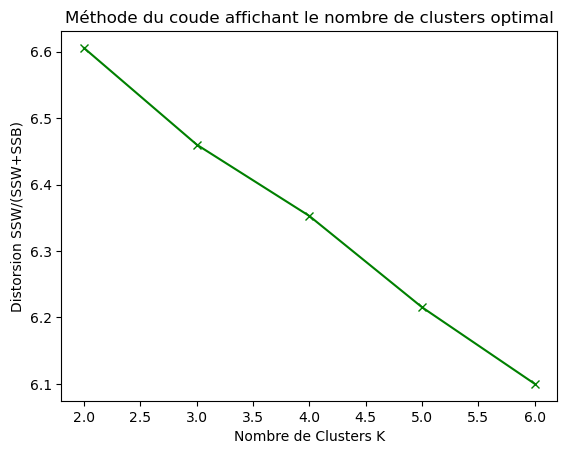

['knn_non_spupervise_euclidean.joblib']

In [13]:
# Test KNN non supervisé distance euclidienne
# recherche meilleurs k entre 2 et 6

from scipy.spatial.distance import cdist

X_scaled =  StandardScaler().fit_transform(X)

distorsions = []
for i in [2,3,4,5,6] :
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_scaled)
    distorsions.append(sum(np.min(cdist(X_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / np.size(X, axis = 0))

plt.plot([2,3,4,5,6], distorsions, 'gx-')
plt.xlabel('Nombre de Clusters K')
plt.ylabel('Distorsion SSW/(SSW+SSB)')
plt.title('Méthode du coude affichant le nombre de clusters optimal')
plt.show()

dump(kmeans, 'model/knn_non_supervise_euclidean.joblib')

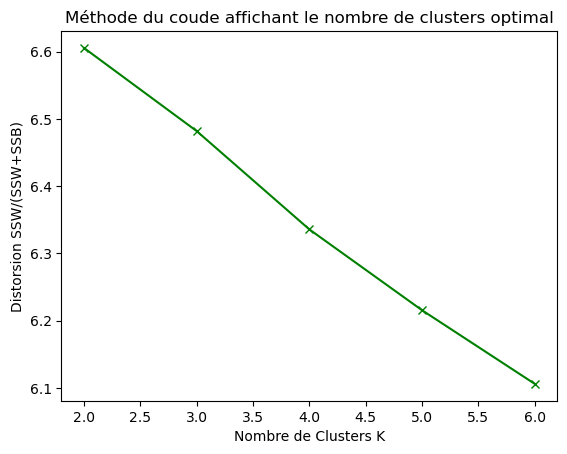

['knn_non_spupervise_minkowski.joblib']

In [14]:
distorsions = []
for i in [2,3,4,5,6] :
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_scaled)
    distorsions.append(sum(np.min(cdist(X_scaled, kmeans.cluster_centers_, 'minkowski'), axis=1)) / np.size(X, axis = 0))

plt.plot([2,3,4,5,6], distorsions, 'gx-')
plt.xlabel('Nombre de Clusters K')
plt.ylabel('Distorsion SSW/(SSW+SSB)')
plt.title('Méthode du coude affichant le nombre de clusters optimal')
plt.show()

dump(kmeans, 'model/knn_non_supervise_minkowski.joblib')

In [15]:
distorsions = []
for i in [2,3,4,5,6] :
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_scaled)
    distorsions.append(sum(np.min(cdist(X_scaled, kmeans.cluster_centers_, 'manhattan'), axis=1)) / np.size(X, axis = 0))

plt.plot([2,3,4,5,6], distorsions, 'gx-')
plt.xlabel('Nombre de Clusters K')
plt.ylabel('Distorsion SSW/(SSW+SSB)')
plt.title('Méthode du coude affichant le nombre de clusters optimal')
plt.show()

dump(kmeans, 'model/knn_non_supervise_manhattan.joblib')

ValueError: Unknown Distance Metric: manhattan

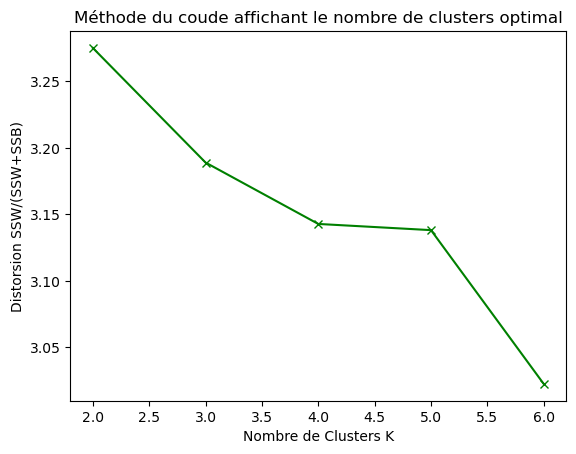

['knn_non_spupervise_chebyshev.joblib']

In [16]:
distorsions = []
for i in [2,3,4,5,6] :
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_scaled)
    distorsions.append(sum(np.min(cdist(X_scaled, kmeans.cluster_centers_, 'chebyshev'), axis=1)) / np.size(X, axis = 0))

plt.plot([2,3,4,5,6], distorsions, 'gx-')
plt.xlabel('Nombre de Clusters K')
plt.ylabel('Distorsion SSW/(SSW+SSB)')
plt.title('Méthode du coude affichant le nombre de clusters optimal')
plt.show()

dump(kmeans, 'model/knn_non_supervise_chebyshev.joblib')

# KNN Best model avec GridSearchCV 4 classes

In [ ]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print(grid.best_score_)
print(grid.best_params_)
dump(grid, 'model/knn_bestmodel_4classes.joblib')

In [23]:
model= load('model/knn_bestmodel_4classes.joblib')
print(model.best_params_)
print('Accuracy train: ', model.score(X_train_scaled, y_train))

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Accuracy train:  0.9961583101816597


C:\Users\juliette.brezillon\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy test:  0.40407430164957225


In [11]:
model= load('model/knn_bestmodel_4classes.joblib')
y_pred = model.predict(X_test_scaled)
clsf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

clsf_report.to_csv('res/knn_4classes_bestmodel.csv', index= True)
print(clsf_report)

              precision    recall  f1-score       support
1.0            0.676124  0.811846  0.737795  17964.000000
2.0            0.277778  0.031934  0.057283   1096.000000
3.0            0.474693  0.341833  0.397454   6667.000000
4.0            0.601568  0.573642  0.587273  16587.000000
accuracy       0.624214  0.624214  0.624214      0.624214
macro avg      0.507541  0.439814  0.444951  42314.000000
weighted avg   0.604843  0.624214  0.607540  42314.000000


In [8]:
# résultat sur train
model= load('model/knn_bestmodel_4classes.joblib')
y_pred = model.predict(X_train_scaled)
clsf_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('res/knn_4classes_bestmodel_train.csv', index= True)
print(clsf_report)

              precision    recall  f1-score        support
1.0            0.993620  1.000000  0.996800  161670.000000
2.0            0.990745  0.997973  0.994346    9869.000000
3.0            0.994457  0.995600  0.995028   60002.000000
4.0            1.000000  0.992102  0.996035  149281.000000
accuracy       0.996158  0.996158  0.996158       0.996158
macro avg      0.994706  0.996419  0.995552  380822.000000
weighted avg   0.996178  0.996158  0.996158  380822.000000


# KNN Best model avec GridSearchCV 2 classes

In [ ]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_train_scaled, y_train_bin)

print(grid.best_score_)
print(grid.best_params_)
dump(grid, 'model/knn_bestmodel_2classes.joblib')

In [24]:
model2 = load("model/knn_bestmodel_2classes.joblib")
print(model2.best_params_)

print('Accuracy train: ', model2.score(X_train_scaled, y_train_bin))

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Accuracy train:  0.9971508998954892


C:\Users\juliette.brezillon\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy test:  0.5570496762300894


In [10]:
model2 = load("model/knn_bestmodel_2classes.joblib")
print(model2.best_params_)
print('Accuracy test: ', model2.score(X_test_scaled, y_test_bin))

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Accuracy test:  0.7448362244174505


In [15]:
model= load('model/knn_bestmodel_2classes.joblib')
y_pred = model.predict(X_test_scaled)
clsf_report = pd.DataFrame(classification_report(y_test_bin, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('res/knn_2classes_bestmodel.csv', index= True)
print(clsf_report)

              precision    recall  f1-score       support
0.0            0.710565  0.731480  0.720871  19060.000000
1.0            0.774468  0.755784  0.765012  23254.000000
accuracy       0.744836  0.744836  0.744836      0.744836
macro avg      0.742517  0.743632  0.742941  42314.000000
weighted avg   0.745683  0.744836  0.745129  42314.000000


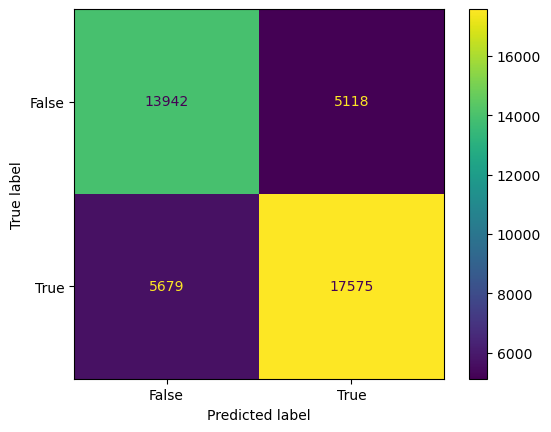

In [16]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test_bin, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show() 

In [8]:
model= load('model/knn_bestmodel_2classes.joblib')
y_pred = model.predict(X_train_scaled)
clsf_report = pd.DataFrame(classification_report(y_train_bin, y_pred, output_dict=True)).transpose()
clsf_report.to_csv('res/knn_2classes_bestmodel.csv', index= True)
print(clsf_report)

              precision    recall  f1-score        support
0.0            0.993858  0.999854  0.996847  171539.000000
1.0            0.999880  0.994935  0.997401  209283.000000
accuracy       0.997151  0.997151  0.997151       0.997151
macro avg      0.996869  0.997395  0.997124  380822.000000
weighted avg   0.997167  0.997151  0.997152  380822.000000


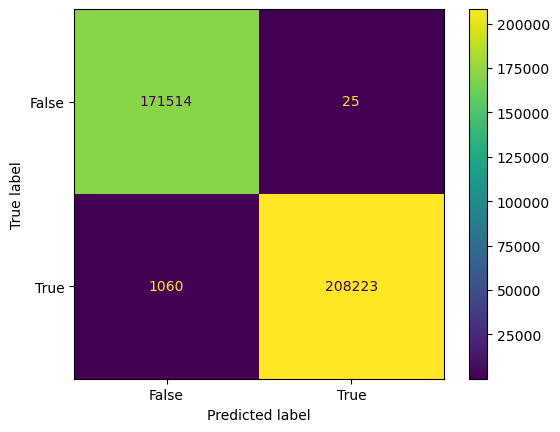

In [9]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_train_bin, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show() 